In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import imblearn

In [2]:
survival_df = pd.read_csv("../Patient-Survival-Model/Resources/cleaned_data_survival_prediction.csv")

In [3]:
survival_df.columns

Index(['hospital_id', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender',
       'height', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max'

In [4]:
survival_df.shape

(56935, 81)

In [5]:
survival_df

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,83,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
3,77,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,admit,Med-Surg ICU,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0
4,118,46.0,25.845717,0,Hispanic,M,167.6,Accident & Emergency,admit,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56930,195,47.0,51.439842,1,Caucasian,M,195.0,Operating Room / Recovery,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,0
56931,121,54.0,19.770448,0,Native American,M,177.8,Accident & Emergency,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
56932,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
56933,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0


In [27]:
X = survival_df.drop('hospital_death', axis=1)
y = survival_df['hospital_death']

In [28]:
X = pd.get_dummies(X)
# y = pd.get_dummies(y)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: hospital_death, dtype: int64

In [29]:
X.head()


,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,...,1,0,0,0,0,0,0,0,0,0
1,81,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,...,0,0,0,0,0,0,1,0,0,0
2,83,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,...,0,0,0,0,1,0,0,0,0,0
3,77,72.0,28.257052,1,154.9,0.004861,67.8,303.0,1304.08,1,...,0,0,0,0,0,0,1,0,0,0
4,118,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
# print(f"Training target statistics: {Counter(y_res)}")
# print(f"Testing target statistics: {Counter(y_test)}")

In [21]:
y_train.shape

(42701, 2)

<AxesSubplot:>

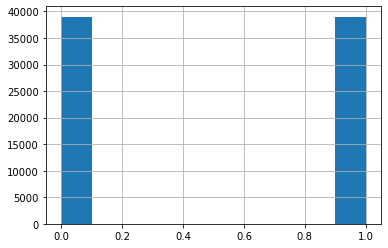

In [34]:
y_res.hist()

In [35]:
reg = LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

0.21709113181346973

In [37]:
# Select the columns that have a nonzero value from the LASSO regression.
reg = Lasso().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

-6.427833899702584e-05

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [38]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(reg)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=Lasso())

In [39]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


ValueError: Found array with 0 feature(s) (shape=(42701, 0)) while a minimum of 1 is required by StandardScaler.

In [40]:
reg = LinearRegression().fit(X_selected_train_scaled, y_train)
reg.score(X_selected_test_scaled, y_test)

NameError: name 'X_selected_train_scaled' is not defined

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [42]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [43]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.92363176506405
Testing Data Score: 0.9265139806098075


In [45]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9234444158216435
Testing Score: 0.9269355065336519


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)


/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression())